## Jupyter Notebook:
check a few things: how to save (Ctrl+S), how to run a code block (Caps+Enter),how to move (arrows), how to create a cell (find it yourself ! : browse the menus a bit before starting !).
Note: in jupyter, like in ipython, if you just write a variable name at the end of your code (or running cell), its value will be displayed (you do not need to write "print(myVariable)", it's enough to write "myVariable")

In [2]:
from platform import python_version
python_version()

'3.6.8'

In [3]:
python_version()
print(python_version()) #does the same as above
"some string with some value, typed into the last line of the cell"

3.6.8


'some string with some value, typed into the last line of the cell'

In [4]:
print(python_version()) #does the same as above
python_version()

3.6.8


'3.6.8'

In [5]:
# ### this is useful only if you unfortunately run suing python2. If you run python3, these lines are effect-less.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Goal of the tutorial:

The aim of this tutorial is to implement the Naive Bayesian calssifier on the MNIST image data set. (optionally, also on the 20newsgroups text data set).

Let's begin with MNIST. It's in the GDrive, and may be accessed "locally" at: 
https://www.lri.fr/~flandes/share/ 
    
MNIST contains images (observations, inputs) of single hand-written digits and the corresponding classes (labels, Ground Truth). 
So it is a 10-classes classification problem (0 to 9).


## Loading the data

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from ipywidgets import FloatProgress
from IPython.display import display

## Load the dataset -- (python2)
# import cPickle, gzip
# with gzip.open('./tp1-mnist.pkl.gz','rb') as f :
#     train_set, valid_set, test_set = cPickle.load(f)

### Load the dataset -- (python3)
import pickle, gzip
with gzip.open('./mnist.pkl.gz','rb') as f :
    u = pickle._Unpickler( f )
    u.encoding = 'latin1'
    train_set, valid_set, test_set = u.load()

NLABELS=10
print(str(len(train_set[0]))+" training examples")
# exemple: 
im    = train_set[0][0] # the first image
label = train_set[1][0] # its label

50000 training examples


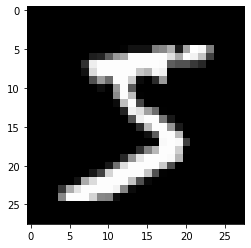

In [12]:
plt.imshow(im.reshape(28,28) , matplotlib.pyplot.cm.gray)    
# plt.contourf(im.reshape(28,28))

## Content of data

Images are stored as numpy arrays, where each line is an image, i.e. a 784-rows vector (28x28=784). Each pixel encodes a Grey value between 0 and 1.
* What do train_set, valid_set, test_set contain ? (size, type, ... )
* Write a function binarize_image(image, threshold) with a default threshold=0.5 to project an image onto binary pixels (black&white intead of grey levels)
* Try various thresholds and look for differences.

In [13]:
def binarize_image(image, threshold=0.5):
    binarized_image = image.copy()
    ## TODO 
    return binarized_image

## Getting to know the data
Here are a few examples

In [14]:
# getting images and their labels
images = train_set[0]
labels = train_set[1]
images_test = test_set[0]
labels_test = test_set[1]
print("shape d'images  :"+str(images.shape))
print("shape de labels :"+str(labels.shape))
# values
print("val. max  ", images.max())
print("val. min  ", images.min())
print("val. mean ", images.mean())
print("val. var  ", images.var())


# how many images represent the digit "5" ?
print("Nombre d'images dont le label est 5 :"+str((labels==5).sum()))
# labels==5 returns an ndarray of same dimensionality as labels but filled with booleans.
# if the label is 5, True (1), else, False (0).
# On peut se servir de cet ndarray pour faire du slicing de images
fives = (images[labels==5])
print("fives contains all images of which the label is 5, there number is:"+str(fives.shape))


shape d'images  :(50000, 784)
shape de labels :(50000,)
val. max   0.99609375
val. min   0.0
val. mean  0.13044983
val. var   0.094427034
Nombre d'images dont le label est 5 :4506
fives contains all images of which the label is 5, there number is:(4506, 784)


## Naive Bayesian (model chosen: Bernoulli)
Observations (images) are initially continuous. We need to project these data onto the space accessible to our model. In the case of Bernoulli, each pixel can only be 0 or 1 (intermediate values cannot be sampled from a Bernoulli law).

### pre-processing (of the data -what else?)

- Apply the thresholding operation to all *train* and *test* data. (it may take ~O(1) minute: try your function on test images, they are fewer)
- Check it on a couple of images.


## Implementing the Naive Bayesian, Bernoulli

To implement this classifier, there are only two steps:
- estimating parameters $\theta$ (including the prior probability for each class).
- inference itself:
    - knowing the parameters, return the posterior probability of classes
    - (for each image) infer the class (given the model, and this image' data)


To-do list:
Before coding, **pen and paper** !
- Which are the parameters $\theta$? Define them precisely.
- Write down the exact equations for each step; ideally, down to the pixel level.

If you don't know how to start, start with the end: write down the probability P(y|X) (see your lecture notes)


Now that **you know exactly what you want**, write down the functions needed.

Check them at several stages: 
- represent the parameters as images or graphs, (choose adequately)
- check your prediction on a couple of examples (not just 1 !!)

In [ ]:
## extract the parameters (those associated to each class, which are essentially "representatives")
## TODO

In [ ]:
## compute the priors (for each class)
## TODO

In [ ]:
## make a function that computes the posterior, for a given image
# trick: when computing log(p), one should type log(1+EPSILON), to avoid float overflow errors (when p~0)
def computePosteriors(image, EPSILON=1e-5):
    posteriors = np.zeros([NLABELS,1])
    ## TODO
    return posteriors

## TODO: debug your function on a single image, of course.

### [option 1: apply your function to all the train/test data]

In [ ]:
def makePrediction(images):
    N = images.shape[0]
    posteriorsAllImages = np.zeros(N)
    prediction_train = np.zeros(N, dtype=int)
    for i in range(N):
        posteriorsAllImages[i] = computePosteriors(images_test[i], EPSILON=1e-5)
        prediction[i] = ## TODO: one-liner. See the help page of: np.argmax()
    return prediction

#prediction_train = makePrediction(images)
prediction_test = makePrediction(images_test)

### [option 2: re-write your function in a more pythonic way, handling all images at once]

In [ ]:
##[option 2]: much more pythonic: array-wise computation 
##(much much faster)
def computePosteriorsAllImages(images, EPSILON=1e-5):
    N = images.shape[0]
    posteriorsAllImages = np.zeros([N, NLABELS])
    ## TODO : re-write the inside of computePosteriors() here, accounting for the new shape of "images"
    return posteriorsAllImages
posteriorsAllImages = computePosteriors(images)
prediction_test ## = TODO: one-liner, same as above, but again, array shapes are slightly different
#prediction_train ## = TODO (same as above)

note: 

at this point, you should have two arrays, *prediction_test_data* and *prediction_train*

## evaluation of the quality of the classifier
evaluate the classifier on the test data:
- compute the error rate
- show the confusion matrix


In [ ]:
#confusion = np.zeros((10,10))
## showing the confusion matrix with a color map ("heat map")
import pylab as pl
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
pl.xlabel('True')
pl.ylabel('Pred.')
pl.show()

## checking using SciKit-learn

We're going to check results by cmparing with SKlearn's implementation' output.
- reproduce the experiment, using 
- try also with a Gaussian model (still Naive Bayes, but Gaussian instead of Bernoulli, still in SKlearn)

In [ ]:
## TODO: choose which class you want to use from the package sklearn.naive_bayes
from sklearn.naive_bayes import ## TODO 
## note: for a Gaussian model, use the data BEFORE binarization.

# Second Example

# Sparse data : 20newsgroups

Let's hop to text classification. Texts are characterized by very sparse distributions (of words).

We'll use the dataset 20newsgroups, which is available within SKlearn.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories=None
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,)

from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(stop_words='english',binary=True)
X_train = vectorizer.transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

# test set
y_train, y_test = data_train.target, data_test.target

- Describe the data (size, type..)

- Train and test the Bernoulli Bayesian classifier using SKlearn's default (hyper-parameters) values

In [ ]:
## hint: you will need to use something like this:
#     clf = YourChosenMethod(parameters=ChosenValueOfParameters)
#     clf.fit(X_train,y_train)
#     clf.score(X_test,y_test)

## TODO

- What are these default parameters ? What do they mean and what values were chosen / What choices were chosen ?
- How to get a classifier without smoothing ? Do you expect it to work better ?

## Impact of smoothing

- Try out several smoothing constants, from $1$ to $10^{-15}$ by steps of factors of $10$
- compute and report the train and test error rates for each


- Plot the curves for these error rates as a function of the smoothing constant(code given below)
- What do you see ? Explain.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.plot(alphas, Test_score, 'x-')
ax.plot(alphas, Train_score, 'o-')
pl.title('Training and Testing score for different values of smoothing')
pl.xlabel('Smoothing')
pl.ylabel('Score')
pl.show() 

Congratulations ! You have performed your first hyper-parameter optimization ! 

Now the need for a third independent set (a.k.a. the vlaidation set) should be very clear to you.

## Multinomial classifier

see https://en.wikipedia.org/wiki/Multinomial_distribution for catching-up on maths.

same questions: (Copy-Paste is your friend, whis question may take you less than 5 min)
- train and test the SKlearn model with default parameters
- What are these default parameters ? What do they mean and what values were chosen / What choices were chosen ?
- What is the impact of smoothing ?

## Crucial point: did we "cheat" ?
- Visualize a couple more data examples, in particular take them all from the same class. Isn't there some piece  of information that we use here, and which looks a bit like "cheating" ?
- Now import data, again using *sklearn.datasets.fetch_20newsgroups()*, but with other values for the argument "remove". How do your classifiers (Bernoulli / Multionmial) change ? 
- Why ? What do you think of this ?

## Think a bit about what you did

What did we do here ? How much did we build an AI ? In the image case, independence of the pixels had a very clear interpretation.  Here as well, the "Naive" assumption of independence has a very clear interpretation. What do you think of this assumption ? 

Do you think this kind of method would work for any serious NLP task ? (e.g. translation)